In [2]:
# Import Python Libraries
import pandas as pd
import numpy as np
import datetime 
# plotting
import matplotlib as mpl
# machline learning package 
import sklearn as skl
# package to use regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#Read CSV File
df = pd.read_csv("18zpallnoagi.csv")
df.head()

,STATEFIPS,STATE,ZIPCODE,AGI_STUB,N1,MARS1,MARS2,MARS4,ELF,CPREP,...,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
0,1,AL,0,0,2036290.0,853350.0,746450.0,393790.0,1851240.0,93480.0,...,36360.0,140470.0,388540.0,1734772.0,1602800.0,5324632.0,1570180.0,4701007.0,36520.0,559783.0
1,1,AL,35004,0,5200.0,2150.0,2100.0,820.0,4730.0,260.0,...,20.0,63.0,1000.0,3171.0,4090.0,11131.0,4050.0,10654.0,50.0,433.0
2,1,AL,35005,0,3190.0,1410.0,840.0,890.0,2880.0,160.0,...,0.0,0.0,530.0,1179.0,2630.0,7589.0,2630.0,7558.0,0.0,0.0
3,1,AL,35006,0,1240.0,490.0,590.0,140.0,1120.0,40.0,...,0.0,0.0,200.0,498.0,1010.0,2834.0,1010.0,2793.0,0.0,0.0
4,1,AL,35007,0,12050.0,4840.0,5180.0,1740.0,10580.0,840.0,...,100.0,307.0,2780.0,11619.0,9020.0,24590.0,8900.0,23889.0,150.0,668.0


In [15]:
#Remove the Aggregated Rows from the dataset
new_df = df.query("ZIPCODE!=0")
new_df = new_df.reset_index(drop=True)
new_df.shape

(27607, 153)

In [ ]:
#Drop the Non-Predictors Columns from the dataset
#new_df=new_df.drop(columns=['STATEFIPS','STATE','ZIPCODE','AGI_STUB','MARS1','MARS2','MARS4','ELF','CPREP','PREP','DIR_DEP','TOTAL_VITA','VITA','TCE','VITA_EIC','RAC','ELDERLY'])
#new_df.head()

In [16]:
#Remove all the Amount Columns as we are going to estimate whether a unemployment category is 2% or less of the total return
for column in new_df.columns:
    if column not in ('A00100','A02650','AGI_STUB','MARS1','MARS2','MARS4','TOTAL_VITA','VITA','VITA_EIC0','RAC'):
        if 'A' in column:
            new_df=new_df.drop(columns=column)

new_df=new_df.drop(columns='ZIPCODE')
new_df.head()
        

,AGI_STUB,N1,MARS1,MARS2,MARS4,ELF,CPREP,PREP,DIR_DEP,N2,...,N10960,N11560,N06500,N10300,N85530,N85300,N11901,N11900,N11902,N12000
0,0,5200.0,2150.0,2100.0,820.0,4730.0,260.0,2410.0,3620.0,10440.0,...,240.0,70.0,3650.0,3930.0,20.0,20.0,1000.0,4090.0,4050.0,50.0
1,0,3190.0,1410.0,840.0,890.0,2880.0,160.0,1710.0,2300.0,6060.0,...,220.0,50.0,1850.0,2080.0,0.0,0.0,530.0,2630.0,2630.0,0.0
2,0,1240.0,490.0,590.0,140.0,1120.0,40.0,830.0,880.0,2550.0,...,60.0,20.0,850.0,920.0,0.0,0.0,200.0,1010.0,1010.0,0.0
3,0,12050.0,4840.0,5180.0,1740.0,10580.0,840.0,5560.0,7660.0,24970.0,...,820.0,200.0,8130.0,9060.0,90.0,100.0,2780.0,9020.0,8900.0,150.0
4,0,7840.0,3010.0,2700.0,2000.0,7290.0,290.0,3920.0,5350.0,15810.0,...,400.0,110.0,4360.0,4860.0,80.0,110.0,1300.0,6370.0,6210.0,180.0


In [17]:
#N02300 - Number of returns with unemployment compensation
#N1 - Number of returns
#Create New Target Column N02300/N1 <= 0.02 then 1 else 0
new_df['n02300_n1_ratio']=new_df['N02300']/new_df['N1']
new_df['n02300_n1_ratio_lt_2pct']=new_df['n02300_n1_ratio'].apply(lambda x: 1 if x <= 0.02 else 0)
new_df.head()

,AGI_STUB,N1,MARS1,MARS2,MARS4,ELF,CPREP,PREP,DIR_DEP,N2,...,N06500,N10300,N85530,N85300,N11901,N11900,N11902,N12000,n02300_n1_ratio,n02300_n1_ratio_lt_2pct
0,0,5200.0,2150.0,2100.0,820.0,4730.0,260.0,2410.0,3620.0,10440.0,...,3650.0,3930.0,20.0,20.0,1000.0,4090.0,4050.0,50.0,0.015385,1
1,0,3190.0,1410.0,840.0,890.0,2880.0,160.0,1710.0,2300.0,6060.0,...,1850.0,2080.0,0.0,0.0,530.0,2630.0,2630.0,0.0,0.018809,1
2,0,1240.0,490.0,590.0,140.0,1120.0,40.0,830.0,880.0,2550.0,...,850.0,920.0,0.0,0.0,200.0,1010.0,1010.0,0.0,0.016129,1
3,0,12050.0,4840.0,5180.0,1740.0,10580.0,840.0,5560.0,7660.0,24970.0,...,8130.0,9060.0,90.0,100.0,2780.0,9020.0,8900.0,150.0,0.014108,1
4,0,7840.0,3010.0,2700.0,2000.0,7290.0,290.0,3920.0,5350.0,15810.0,...,4360.0,4860.0,80.0,110.0,1300.0,6370.0,6210.0,180.0,0.034439,0


In [18]:
#Generate Predictors. All columns except N02300 columns
predictors = []
for column in new_df.columns:
    if 'N02300' not in column:
        if 'n02300' not in column:
            predictors.append(column)

target = 'n02300_n1_ratio_lt_2pct'

Automatically created module for IPython interactive environment


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[15:02:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




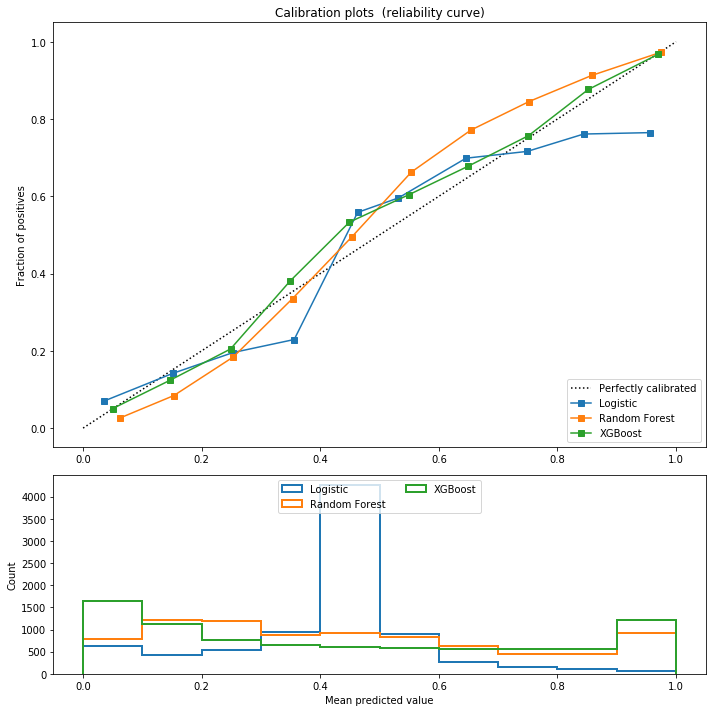

In [22]:
print(__doc__)

import numpy as np
np.random.seed(0)
nObs=100000
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import calibration_curve
import xgboost as xgb
from sklearn.model_selection import train_test_split
x = new_df[predictors].head(nObs)
#.values
y =  new_df['n02300_n1_ratio_lt_2pct'].head(nObs)  #.values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.99,
                                                    random_state=42)


# Create classifiers
lr = LogisticRegression(solver='lbfgs')
rfc = RandomForestClassifier(n_estimators=100)

#####
#add xgb.XGBClassifier here
xgbm = xgb.XGBClassifier(max_depth=4,  min_child_weight=3, learning_rate=0.1, n_estimators=500,
                         silent=True,  
                         objective='binary:logistic',
                         gamma=0,   
                         max_delta_step=0,
                         subsample=1,  
                         colsample_bytree=0.8,
                         colsample_bylevel=0.8,
                         reg_alpha=0,
                         reg_lambda=0,
                         scale_pos_weight=1,
                         seed=1,
                         missing=None) 
#####

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=0)


# #############################################################################
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(lr, 'Logistic'),
                  (rfc, 'Random Forest'), 
                  (xgbm, 'XGBoost')]:
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

In [30]:
#Evaluate Model
from sklearn.metrics import confusion_matrix,classification_report
from dmba import classificationSummary,gainsChart


print('Model Evaluation')
print('Logistic Regression')
print(classificationSummary(y_test,lr.fit(X_train,y_train).predict(X_test),class_names=[0,1]))
print('Random Forest Regression')
print(classificationSummary(y_test,rfc.fit(X_train,y_train).predict(X_test),class_names=[0,1]))
print('XGBoost Regression')
print(classificationSummary(y_test,xgbm.fit(X_train,y_train).predict(X_test),class_names=[0,1]))


Model Evaluation
Logistic Regression


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Confusion Matrix (Accuracy 0.5974)

       Prediction
Actual    0    1
     0 3980  528
     1 2807  968
None
Random Forest Regression
Confusion Matrix (Accuracy 0.8053)

       Prediction
Actual    0    1
     0 3968  540
     1 1073 2702
None
XGBoost Regression
[15:29:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Confusion Matrix (Accuracy 0.8061)

       Prediction
Actual    0    1
     0 3853  655
     1  951 2824
None


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Text(0.5, 15.0, 'Predicted label')

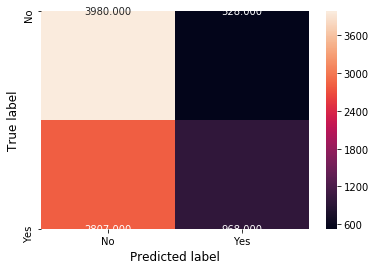

In [33]:
import seaborn as sn
sn.heatmap(confusion_matrix(y_test,lr.fit(X_train,y_train).predict(X_test)), annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"],)
plt.ylabel('True label',fontsize=12)
plt.xlabel('Predicted label',fontsize=12)